In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

In [2]:
h_laser_low = 1000
h_laser_med = 1000
h_laser_high = 1000

In [3]:
date = "20160825-143207-156"
fname = 'results/' + date + '.txt'

print date
data = np.loadtxt(fname)

20160825-143207-156


In [4]:
data.shape

(22, 3)

In [5]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()

In [6]:
print data.shape[0]

idx_arr = altitude.argsort(axis=0)
print idx_arr.shape[0]

22
22


In [7]:
pix_dist = pix_dist[idx_arr]
altitude = altitude[idx_arr]
alt_err = alt_err[idx_arr]

In [8]:
# Make data sorted by altitude
data[:, 0] = pix_dist
data[:, 1] = altitude
data[:, 2] = alt_err
# Leave only lines with alt_error less than 50% of altitude
data = data[ data[:, 2] / data[:, 1] < 0.5 ]
print data

[[  100.       434.5767    45.6481]
 [   49.       886.8911    98.3588]
 [   41.      1059.9431   120.9126]
 [   39.      1114.2991   128.33  ]
 [   38.      1143.6228   132.4015]
 [   37.      1174.5315   136.7476]
 [   37.      1174.5315   136.7476]
 [   35.      1241.6476   146.3817]
 [   34.      1278.1666   151.7399]
 [   34.      1278.1666   151.7399]
 [   33.      1316.899    157.5144]
 [   33.      1316.899    157.5144]
 [   32.      1358.0521   163.755 ]
 [   31.      1401.8602   170.5195]
 [   31.      1401.8602   170.5195]
 [   29.      1498.5402   185.9019]
 [   27.      1609.5432   204.3578]
 [   27.      1609.5432   204.3578]
 [   27.      1609.5432   204.3578]
 [   26.      1671.4487   215.0307]
 [   24.      1810.7361   240.0706]
 [   23.      1889.4637   254.867 ]]


In [9]:
# Shape after removing items with ratio_err > 50%
data.shape

(22, 3)

In [10]:
pix_dist = data[: , 0].ravel()
altitude = data[: , 1].ravel()
alt_err = data[: , 2].ravel()

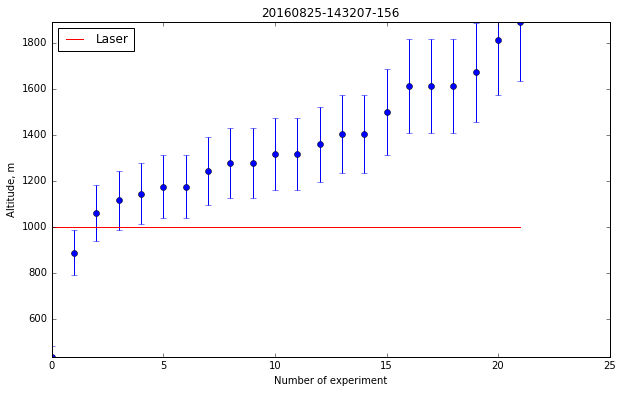

In [11]:
plt.figure(figsize=(10, 6))
plt.errorbar(range(altitude.shape[0]), altitude, yerr=alt_err, marker='o', linestyle='None')
plt.title(date)
plt.xlabel('Number of experiment')
plt.ylabel('Altitude, m')
plt.plot(range(altitude.shape[0]), h_laser_low * np.ones_like(altitude), 'r', label='Laser')
plt.plot(range(altitude.shape[0]), h_laser_med * np.ones_like(altitude), 'r')
plt.plot(range(altitude.shape[0]), h_laser_high * np.ones_like(altitude), 'r')
plt.legend(loc = 'upper left')
plt.ylim( (min( altitude.min(), 0.6 * h_laser_low),
           max(altitude.max(), 1.1 * h_laser_high)) )
plt.savefig('results/' +'plot_' + date + '_' + str(altitude.shape[0]) + '.png')

In [12]:
print altitude

[  434.5767   886.8911  1059.9431  1114.2991  1143.6228  1174.5315
  1174.5315  1241.6476  1278.1666  1278.1666  1316.899   1316.899
  1358.0521  1401.8602  1401.8602  1498.5402  1609.5432  1609.5432
  1609.5432  1671.4487  1810.7361  1889.4637]
